In [71]:
# pandas
import pandas as pd
# from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
# jupyter notebook
%matplotlib inline

from IPython.display import display

# remove warnings
import warnings
warnings.filterwarnings('ignore')

# check input data
import os
print(os.listdir('./input'))

['.DS_Store', 'test.csv', 'submission.csv', 'train.csv']


In [72]:
# load date with continous counting Id 
train = pd.read_csv('./input/train.csv', index_col='Id')
test  = pd.read_csv('./input/test.csv',  index_col='Id')

print(train.shape)
display(train.head())

print(test.shape)
display(test.head())

(1460, 80)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Skew is: 1.8828757597682129


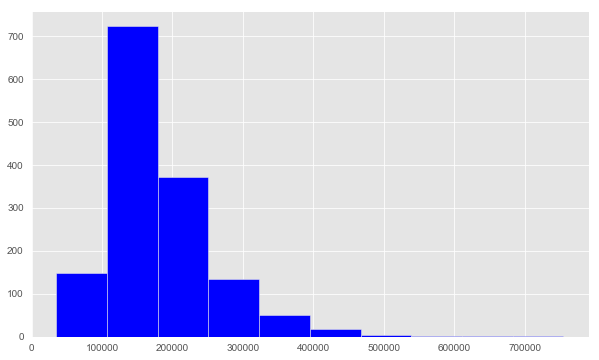

In [73]:
# matplot flat style 
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)   #size
# plt.rcParams['savefig.dpi']  = 300       #pixel
# plt.rcParams['figure.dpi']   = 300       #resolution
train.head(5)
train.SalePrice.describe()
print("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

In [74]:
# select numeric features
numeric_feature = train.select_dtypes(include=[np.number])
numeric_feature.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [75]:
# analyse features correlated with each other
corr = numeric_feature.corr()
# select features corr-to SalePrice 
print(corr['SalePrice'].sort_values(ascending=False)[1:11], '\n')
print(corr['SalePrice'].sort_values(ascending=False)[-10:])

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64 

3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [76]:
# How many unique features
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

In [77]:
# Pivot and plot the intended aggregate function
def pivotandplot(data, variable, onVariable, aggfunc):
    pivot_var = data.pivot_table(index   = variable,
                                 values  = onVariable,
                                 aggfunc = aggfunc)
    pivot_var.plot(kind='bar', color='blue')
    plt.xlabel(variable)
    plt.ylabel(onVariable)
    plt.xticks(rotation=0) #xlabel rotation angle
    plt.show()

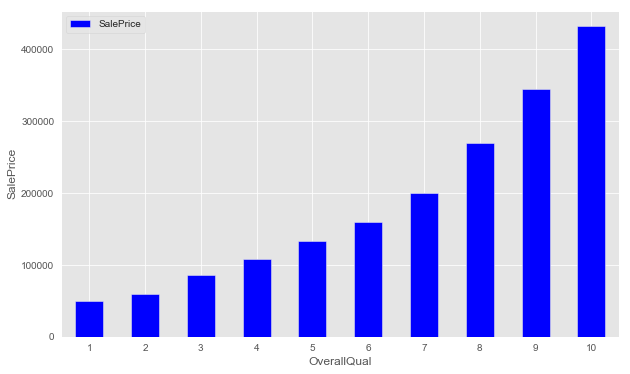

In [78]:
pivotandplot(train, 'OverallQual', 'SalePrice', np.median)

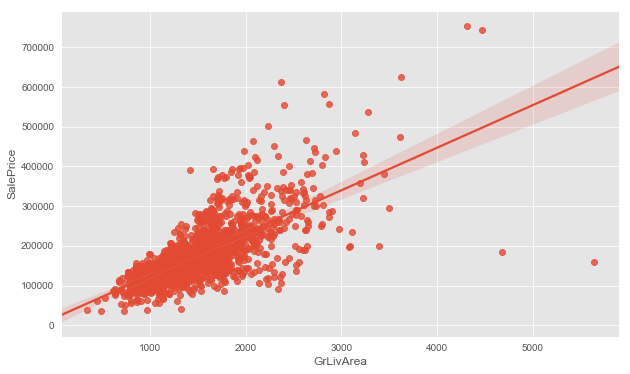

In [79]:
_ = sns.regplot(train['GrLivArea'], train['SalePrice'])

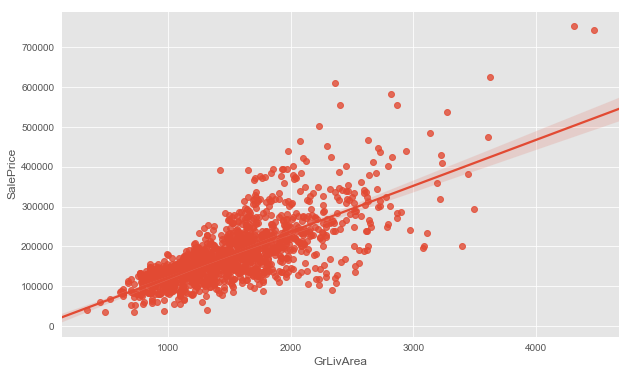

In [80]:
# Remove the outliers(2 points in rightdown corner)
train = train.drop(train[(train['GrLivArea']>4000) & 
                         (train['SalePrice']<300000)].index)
_ = sns.regplot(train['GrLivArea'], train['SalePrice'])

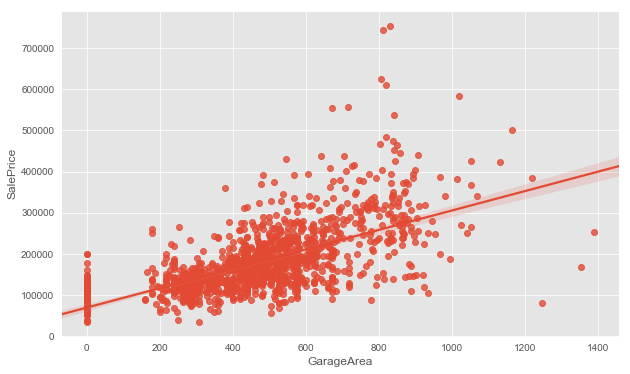

In [81]:
_ = sns.regplot(train['GarageArea'], train['SalePrice'])

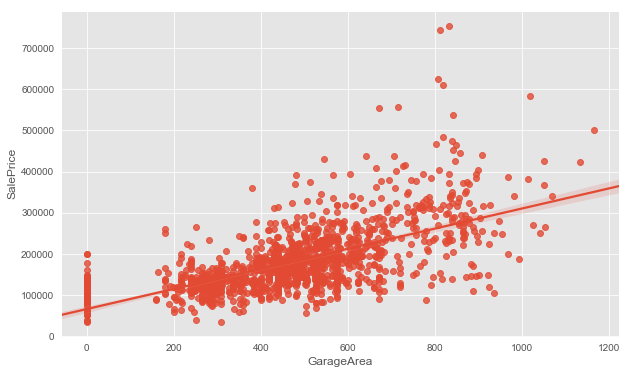

In [82]:
train = train[train['GarageArea']<1200]
_ = sns.regplot(train['GarageArea'], train['SalePrice'])
# Do not delete data with 0 GarageArea

### Impute the Data for missing values
* Before imputing the categorical values it is very important that we impute it on entire (Dev + Test)
* This is of outmost importance since some of the categories might be missing in the test data  which will create problems in OneHotEncoding later when we run models on test data

In [83]:
# Merge train and text data
# get the ln of SalePrice, +1 because ln0 is illogical
train['log_SalePrice'] = np.log(train['SalePrice']+1)
# 2-dimension array use double []
salePrices = train[['SalePrice', 'log_SalePrice']]
salePrices.head()

,SalePrice,log_SalePrice
Id,,
1,208500,12.247699
2,181500,12.109016
3,223500,12.317171
4,140000,11.849405
5,250000,12.429220


In [84]:
# make sure the features are the same in two dataset
train = train.drop(columns=['SalePrice', 'log_SalePrice'])
print(train.shape)
print(test.shape)

(1454, 79)
(1459, 79)


In [85]:
all_data = pd.concat((train, test))
print(all_data.shape)
all_data.head()

(2913, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [87]:
# processing null data
null_data = pd.DataFrame(all_data.isnull().sum().
                         sort_values(ascending=False))[:50]

null_data.columns = ['Null Count']
null_data.index.name = 'Feature'
null_data

,Null Count
Feature,
PoolQC,2904
MiscFeature,2809
Alley,2715
Fence,2342
FireplaceQu,1419
LotFrontage,485
GarageCond,159
GarageQual,159
GarageYrBlt,159


In [88]:
# get the null percentage
(null_data/len(all_data)) * 100

,Null Count
Feature,
PoolQC,99.691040
MiscFeature,96.429797
Alley,93.202884
Fence,80.398215
FireplaceQu,48.712667
LotFrontage,16.649502
GarageCond,5.458290
GarageQual,5.458290
GarageYrBlt,5.458290


* 99% of Pool Quality Data is missing.In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
* Similar is case for Garage column

But what are the 96% missing Miscelleanous features ?

In [89]:
print("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


In [92]:
# Impute Categorical features for missing values and relace by 'None'
for col in ('PoolQC', 'MiscFeature', 'Alley', 'Fence', 
            'FireplaceQu', 'GarageType', 'GarageFinish', 
            'GarageQual', 'GarageCond', 'BsmtQual', 
            'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
            'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [95]:
# Impute Numerical features for missing values and replace by zero
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 
            'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
            'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 
            'MasVnrArea'):
    all_data[col] = all_data[col].fillna(0)

In [103]:
# mode(): getting the most frequent number, return a df use the 1st
for col in ('MSZoning', 'Electrical', 'KitchenQual', 
            'Exterior1st', 'Exterior2nd', 'SaleType', 
            'Functional', 'Utilities'):
    all_data[col] = all_data[col].fillna(all_data[col].mode()[0])

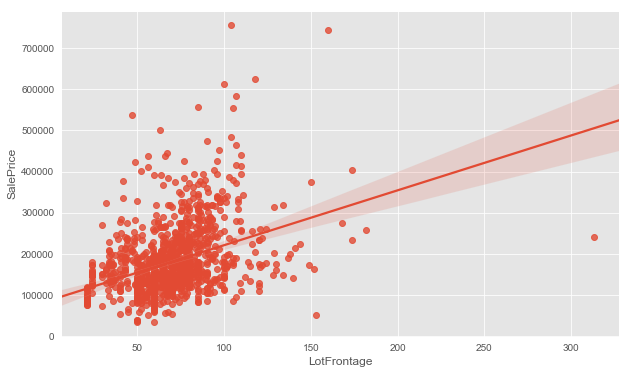

In [122]:
_ = sns.regplot(train['LotFrontage'], salePrices['SalePrice'])

In [127]:
# Impute the LotFrontage with Median values
all_data['LotFrontage'] = all_data.groupby('Neighborhood')[
    'LotFrontage'].apply(lambda x: x.fillna(x.median()))

### New Features
* TotalBsmtSF - Total Basement Square Feet
* 1stFlrSF - First Floor Square Feet
* 2ndFlrSF - Second Floor Square Feet

All the above three feature define area of the house and we can easily combine these to form TotalSF - Total Area in square feet

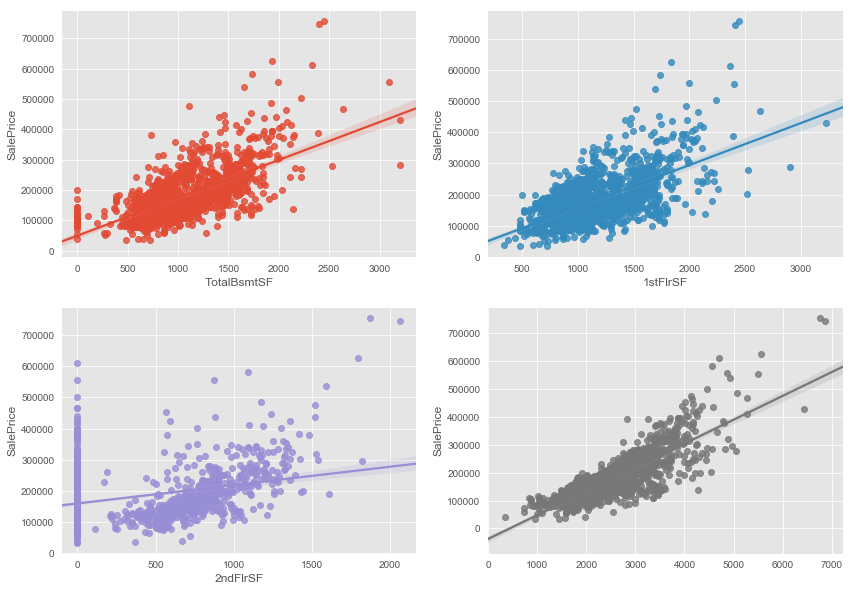

In [128]:
# check if this thought works
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(14, 10)
_ = sns.regplot(train['TotalBsmtSF'], salePrices['SalePrice'], 
                ax=ax1)
_ = sns.regplot(train['1stFlrSF'], salePrices['SalePrice'], 
                ax=ax2)
_ = sns.regplot(train['2ndFlrSF'], salePrices['SalePrice'], 
                ax=ax3)
_ = sns.regplot(train['TotalBsmtSF']+train['1stFlrSF']+train['2ndFlrSF'], 
                salePrices['SalePrice'], 
                ax=ax4)

In [131]:
# Impute the entire data set
all_data['TotalSF'] = all_data['TotalBsmtSF'] + \
                      all_data['1stFlrSF'] + \
                      all_data['2ndFlrSF']
        
# Add two new variables for No nd floor and no basement
all_data['No2ndFlr'] = (all_data['2ndFlrSF']==0)
all_data['NoBsmt'] = (all_data['TotalBsmtSF']==0)